# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import ndimage
import os
%matplotlib inline

In [2]:
def ensure_dir(file_path):
    if not os.path.exists(file_path):
        os.makedirs(file_path)

# Main

In [3]:
figmap = [[np.nan, 7,15,23,31,39,47,np.nan],
          [     1, 8,16,24,32,40,48,    55],
          [     2, 9,17,25,33,41,49,    56],
          [     3,10,18,26,34,42,50,    57],
          [     4,11,19,27,35,43,51,    58],
          [     5,12,20,28,36,44,52,    59],
          [     6,13,21,29,37,45,53,    60],
          [np.nan,14,22,30,38,46,54,np.nan]]
figmap = np.array(figmap)

In [10]:
exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210720\\SplitData\\'
# exp_folder = 'D:\\GoogleDrive\\retina\\Troy\'s data\\20211126\\SplitData\\'
# exp_folder = 'D:\\GoogleDrive\\retina\\Exps\\2021\\1130\\SplitData2\\'
ensure_dir(exp_folder+'STA')
ensure_dir(exp_folder+'STA\\Fig')

In [7]:
import warnings
warnings.simplefilter('ignore')

dt = 0.01
sampling_rate = 20000

for filename in os.listdir(exp_folder):
    # if not (filename.find('repeat')==-1) or (filename.find('.mat')==-1):
    if filename.find('mat')==-1:
        continue
    print(filename[:-17]+filename[-5])

    annots = loadmat(exp_folder+filename, squeeze_me = True)
   
    TicTocer = annots['a_data'][1]
    startPoint = np.where(TicTocer>38000)[0][0]
    endPoint = np.where(TicTocer>38000)[0][-1]
    x = annots['a_data'][0, startPoint:endPoint+1]
    x = np.convolve(x, np.ones(int(sampling_rate*dt*0.5))/int(sampling_rate*dt*0.5), 'same')
    x = x[int(sampling_rate*dt*0.5)::int(sampling_rate*dt)]
    x = x.astype(float)
    x = (x-np.mean(x))/np.std(x)
    T = np.arange(len(x))*dt
    XcT = T-T[int(len(T)/2)]

    window = [-1,1] # second
    timeshift = np.arange(window[0], window[1]+dt, dt)
    STA_cell = [0]*60
    for channelnumber in np.arange(1,61):
        try:
            Spike = annots['Spikes'][channelnumber-1]
            Spike = Spike[np.where(Spike>startPoint/sampling_rate)[0][0]:np.where(Spike<endPoint/sampling_rate)[0][-1]]-startPoint/sampling_rate
        except: continue
        rstate, _ = np.histogram(Spike, np.append(T, T[-1]+dt))
        if sum(rstate)/len(rstate)/dt <= 0.3 : continue

        nXcorr = np.correlate(x, rstate, 'same')/np.correlate(np.ones_like(x), rstate, 'same')
        STA_cell[channelnumber-1] = nXcorr[np.arange(np.where(XcT == window[0])[0],np.where(XcT ==  window[1])[0]+1)]
        # timeshift, Information = MIfunc(rstate, xstate, dt, window, perSpike = True)
        # Information_cell[channelnumber-1] = Information.copy()
    np.savez(exp_folder+'STA\\STA_'+filename[:-17]+filename[-5]+'.npz', STA_cell = STA_cell, timeshift = timeshift)

diode_OU_tau=500ms_cutoff=0_mean10_amp2_0
diode_OU_tau=500ms_cutoff=1_coeff=0.2_0
diode_OU_tau=500ms_cutoff=1_coeff=0.6_0
diode_OU_tau=500ms_cutoff=1_coeff=1.3_0
diode_OU_tau=500ms_cutoff=1_mean10_amp2_0
diode_OU_tau=500ms_cutoff=1_mean=10_amp=0.5_0
diode_OU_tau=500ms_cutoff=1_mean=10_amp=1.5_0
diode_OU_tau=500ms_cutoff=1_mean=10_amp=1_0
diode_OU_tau=500ms_cutoff=1_mean=10_amp=3_0
diode_WhiteNoise_mean=10_amp=0.5_0
diode_WhiteNoise_mean=10_amp=1.5_0
diode_WhiteNoise_mean=10_amp=1_0
diode_WhiteNoise_mean=10_amp=2_0
diode_WhiteNoise_mean=10_amp=3_0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

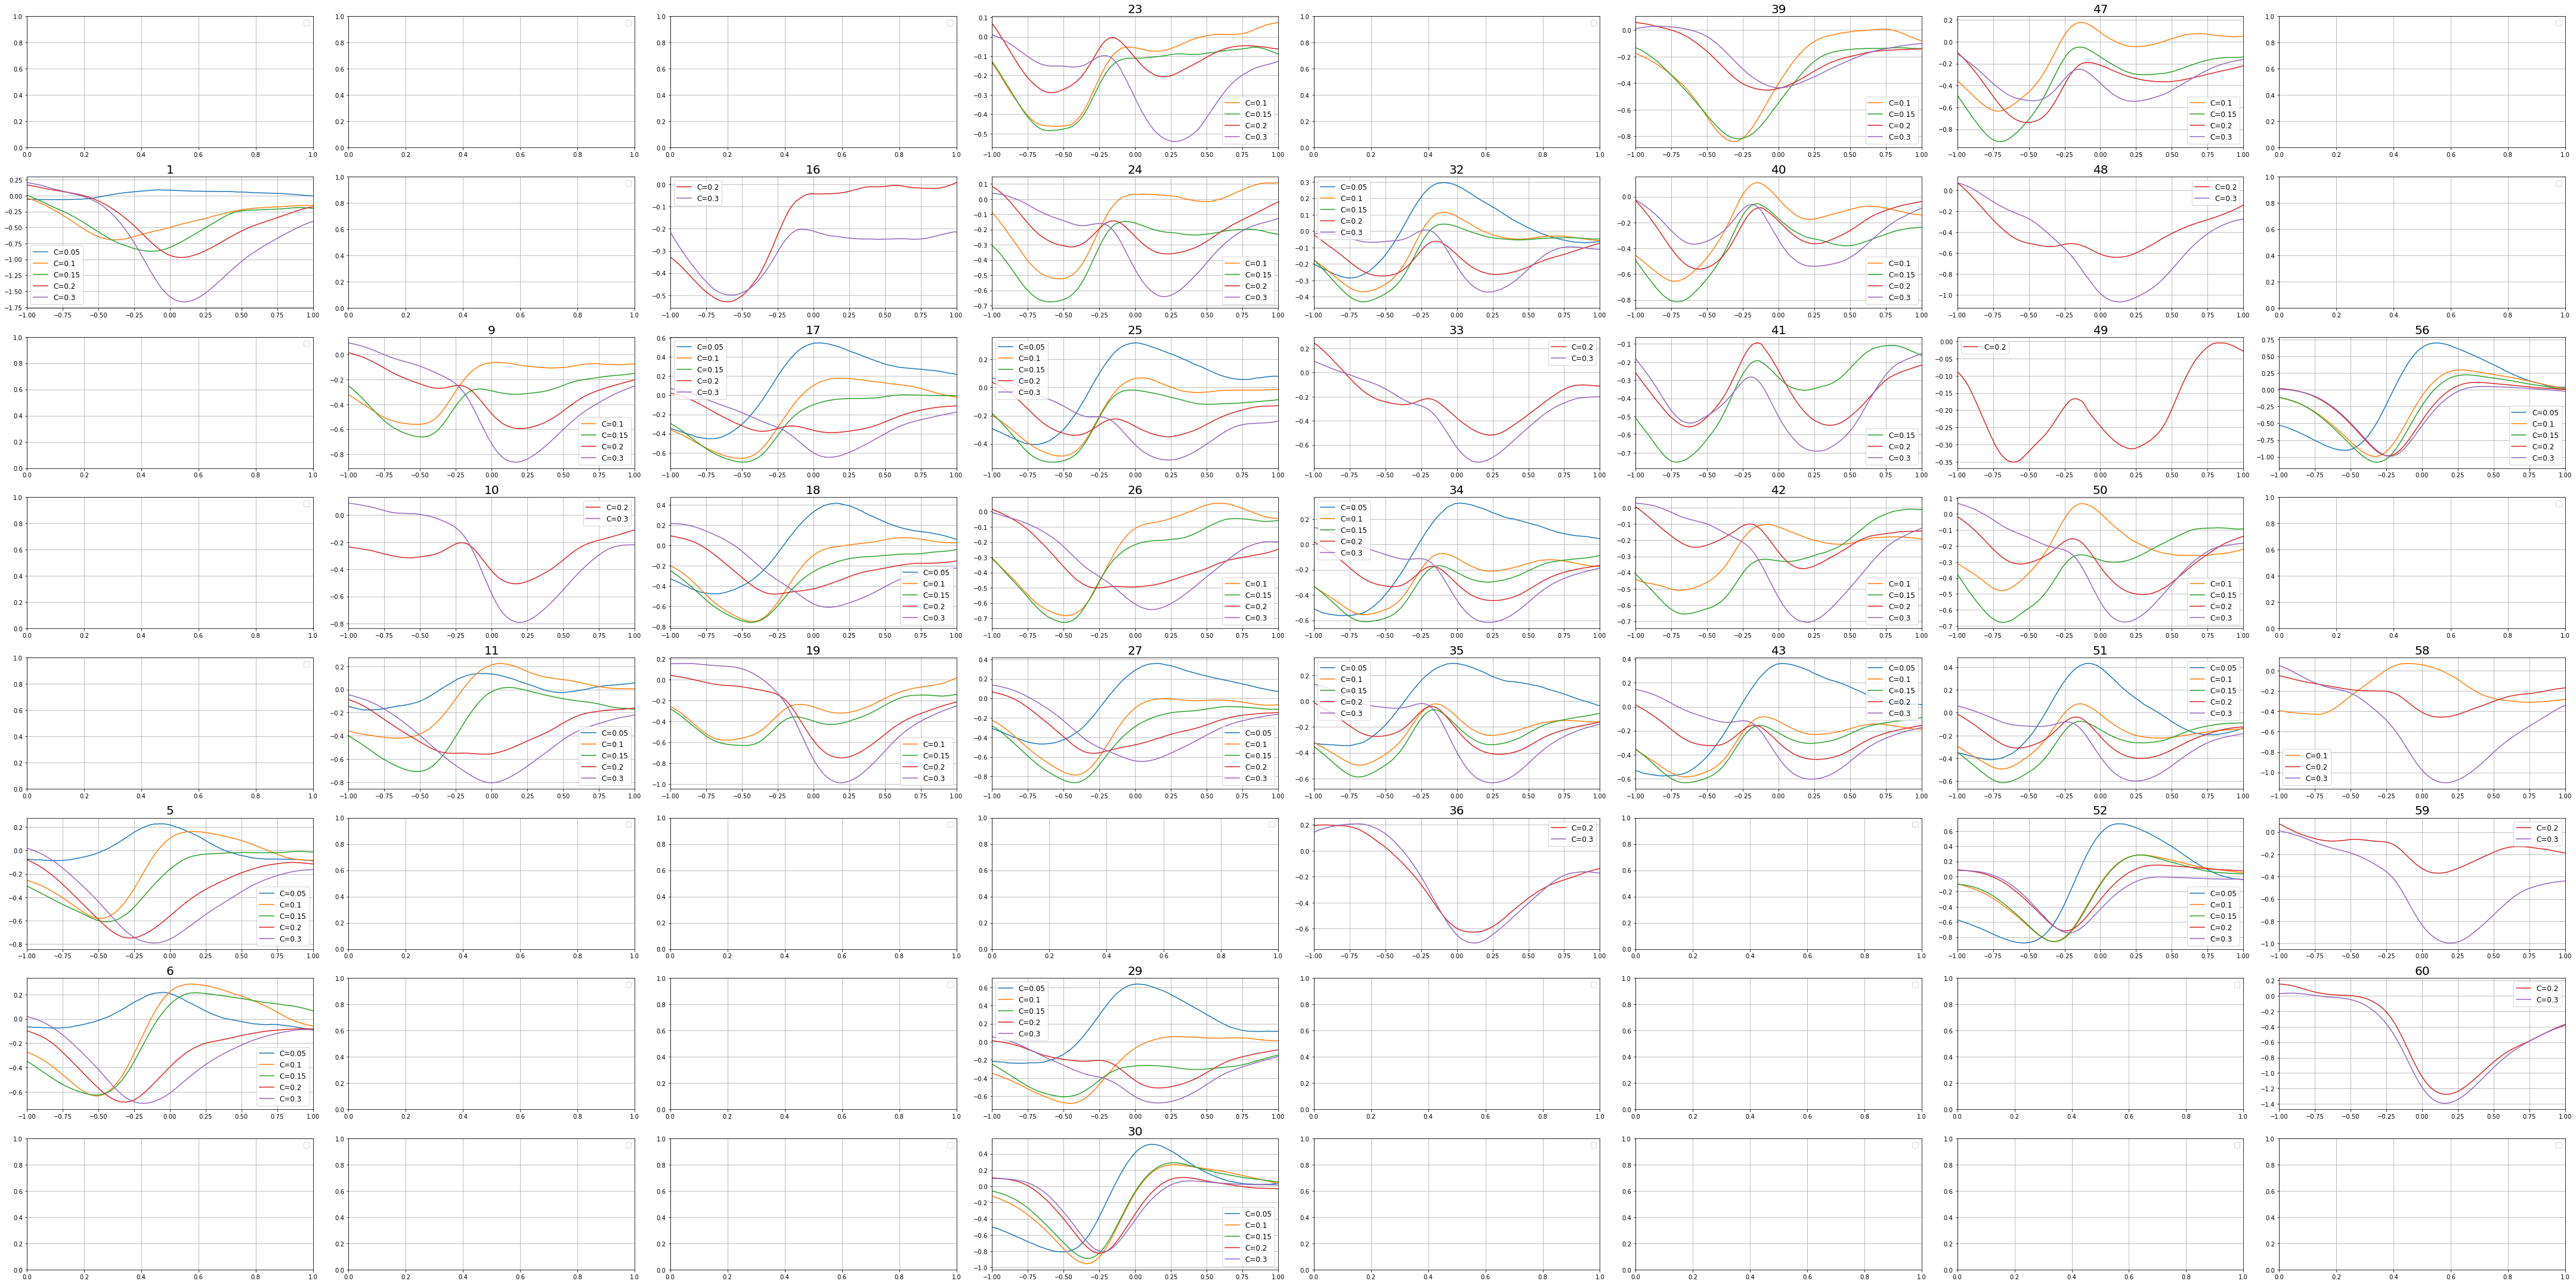

In [11]:
Mean = 10
MIdFcfig, MIdFcax = plt.subplots(nrows=8, ncols=8)
cmind = 0
filenames = ['STA_diode_OU_tau=500ms_cutoff=1_mean=10_amp=0.5_0',
             'STA_diode_OU_tau=500ms_cutoff=1_mean=10_amp=1_0',
             'STA_diode_OU_tau=500ms_cutoff=1_mean=10_amp=1.5_0',
             'STA_diode_OU_tau=500ms_cutoff=1_mean10_amp2_0',
             'STA_diode_OU_tau=500ms_cutoff=1_mean=10_amp=3_0']
for Contrast in [0.05,0.1,0.15,0.2,0.3]:
    loadfiles = np.load(exp_folder+'STA\\'+filenames[cmind]+'.npz', allow_pickle=True)
    for k in loadfiles.files:
        vars()[k] = loadfiles[k][()]

    for cn in range(60):
        STA = STA_cell[cn]
        try:
            MIdFcax[np.where(figmap == cn+1)][0].plot(timeshift,STA,  label='C='+str(Contrast), color = plt.cm.tab10(cmind))
            MIdFcax[np.where(figmap == cn+1)][0].set_xlim(timeshift[0],timeshift[-1])
            MIdFcax[np.where(figmap == cn+1)][0].set_title(str(cn+1), fontsize = 20)
        except:
            continue
#         MIdFcax[np.where(figmap == cn+1)][0].set_xlabel(r'$\delta t$ (s)', fontsize = 16)
#         MIdFcax[np.where(figmap == cn+1)][0].set_ylabel(r'Information (bit/s)', fontsize = 16)
    cmind += 1

for ax1d in MIdFcax:
    for ax in ax1d:
        ax.legend(fontsize = 12)
        ax.grid()
MIdFcfig.set_size_inches(60, 30)
MIdFcfig.tight_layout()
MIdFcfig.savefig(exp_folder+'STA\\Fig\\DCCM_LPOU_STA_M='+str(Mean)+'_1Hz.tif', bbox_inches = 'tight',pad_inches = 0.3)

# 0513
diode_OU_tau=500ms_cutoff=0_mean10_amp2_07-Jul-2021_0.mat:  10-2 <br>
diode_OU_tau=500ms_cutoff=2_coeff=0.2_07-Jul-2021_0.mat:    2 -0.4 <br>
diode_OU_tau=500ms_cutoff=2_coeff=0.6_07-Jul-2021_0.mat:    6 -1.2 <br>
diode_OU_tau=500ms_cutoff=2_coeff=1.5_07-Jul-2021_0.mat:    15-3 <br>
diode_OU_tau=500ms_cutoff=2_mean10_amp2_07-Jul-2021_0.mat:  10-2 <br>
diode_OU_tau=500ms_cutoff=2_meaninten=10_07-Jul-2021_0.mat: 10-2 <br>
diode_OU_tau=500ms_cutoff=2_meaninten=15_07-Jul-2021_0.mat: 15-2 <br>
diode_OU_tau=500ms_cutoff=2_meaninten=5_07-Jul-2021_0.mat:  5 -2 <br>
diode_WhiteNoise_mean=5_07-Jul-2021_0.mat:                  5 -2 <br>
diode_WhiteNoise_mean=10_07-Jul-2021_0.mat:                 10-2 <br>
diode_WhiteNoise_mean=15_07-Jul-2021_0.mat:                 15-2 <br>

# 0716
